In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [4]:
# TODO
df = pd.read_csv('heart.csv')

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [7]:
# TODO
print("Head of the dataset:")
print(df.head())
print('\n*********************')
print("\nMissing values:")
print(df.isnull().sum())
print('\n*********************')
num_samples, num_features = df.shape
print("\nNumber of samples:", num_samples)
print("Number of features:", num_features)
print('\n*********************')
print("\nData types of features:")
print(df.dtypes)
print('\n*********************')
print("\nSummary statistics:")
print(df.describe())

Head of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

*********************

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*********************

Number of samples: 1025
Number of features: 14

*********************

Data types of fe

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [8]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [9]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [45]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    num_epochs = 100
    learning_rate = 0.1
    w = np.zeros(X.shape[1])
    
    for epoch in range(num_epochs):
        
        for i in range(X.shape[0]):
            y_predicted = np.sign(np.dot(X[i], w))
            
            if Y[i] * y_predicted <= 0:
                w += learning_rate * Y[i] * X[i]

    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [56]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here
    num_epochs = 1000
    learning_rate = 0.05
    w = np.zeros(X.shape[1])

    errors = []
    losses = []

    for epoch in range(num_epochs):
        epoch_error = 0
        epoch_loss = 0

        for i in range(X.shape[0]):
            y_predicted = np.sign(np.dot(X[i], w))

            if Y[i] * y_predicted <= 0:
                w += learning_rate * Y[i] * X[i]
                epoch_error += 1
                epoch_loss += 1 - Y[i] * np.dot(X[i], w)
        
        errors.append(epoch_error)
        losses.append(epoch_loss)

    # Plotting errors
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Num errors')
    plt.title('Number of Misclassifications per Epoch')
    plt.show()

    # Plotting total loss
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Total Loss per Epoch')
    plt.gca().invert_yaxis()
    plt.show()

    return w

In [57]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
randomized_index = np.random.permutation(X.shape[0])
X = X[randomized_index]
y = y[randomized_index]
y = np.array([-1 if label == 0 else label for label in y])

In [58]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.full((X.shape[0], 1), -1)

# Concatenate the original X with the bias column
X = np.hstack((X, bias_column))

In [59]:
# TODO: Split the data to train and test with a 0.2 ratio
test_size = 0.2
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

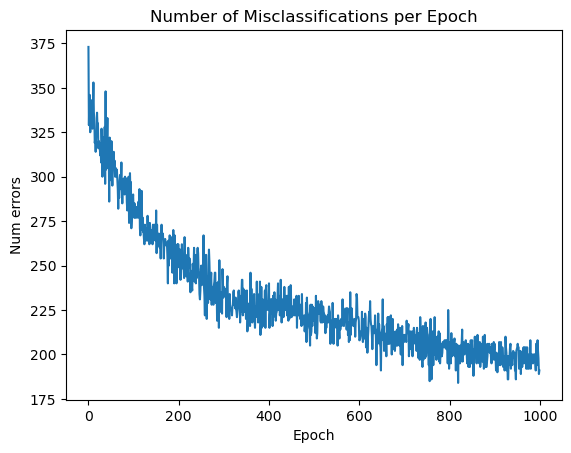

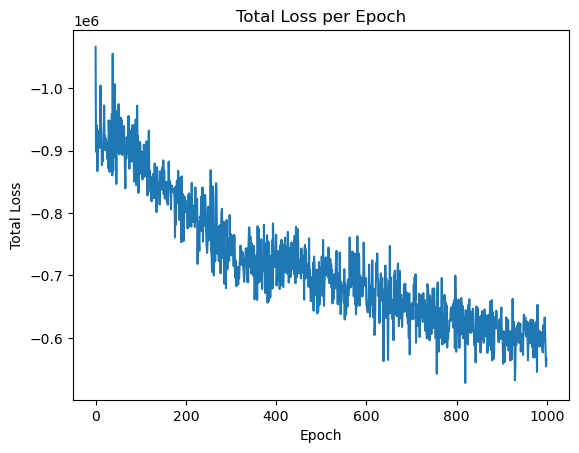

In [60]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [17]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    correct_predictions = np.sum(y_true == y_pred)

    total_predictions = len(y_true)
    
    accuracy = correct_predictions / total_predictions
    
    return accuracy

Get the accuracy of your model using the function you implemented.

In [61]:
# TODO

predictions = np.dot(X_val, w)
predictions[predictions <= 0] = -1
predictions[predictions > 0] = 1

print(accuracy_score(y_val, predictions))

0.8097560975609757


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [82]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros([2,2])
    # TODO: Populate the confusion matrix

    for i in range(len(actual)) :
        if actual[i] == 1 and predicted[i] == 1 :
            matrix[0][0] += 1
        if actual[i] == -1 and predicted[i] == +1 :
            matrix[0][1] += 1
        if actual[i] == 1 and predicted[i] == -1 :
            matrix[1][0] += 1
        if actual[i] == -1 and predicted[i] == -1 :
            matrix[1][1] += 1
    
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [87]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


Now plot the confusion matrix for your model:

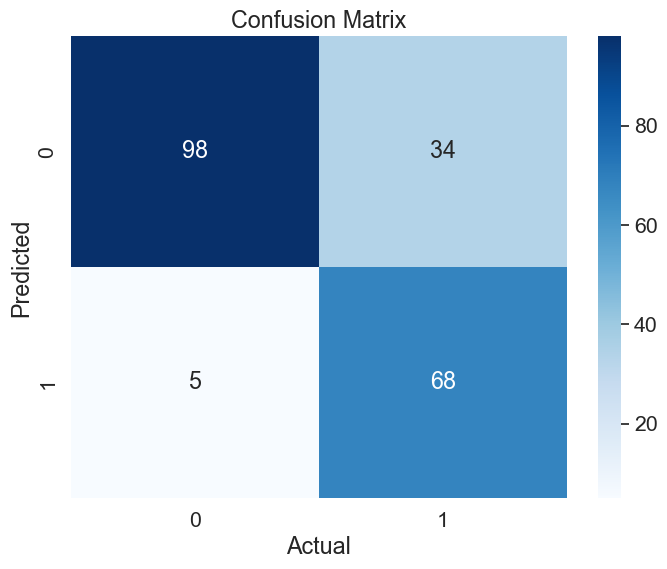

In [89]:
# TODO
cm = confusion_matrix(y_val, predictions, _)
plot_confusion_matrix(cm, _)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [90]:
def recall_score(cm):
  #TODO: return the recall score
    return cm[0][0] / (cm[0][0] + cm[1][0])
print(recall_score(cm))

0.9514563106796117


In [91]:
def precision_score(cm):
  #TODO: return the precision score
    return cm[0][0] / (cm[0][0] + cm[0][1])
print(precision_score(cm))

0.7424242424242424


In [93]:
def f1_score(cm):
  #TODO: return the f1 score
    return 2 * ((precision_score(cm) * recall_score(cm)) / ((precision_score(cm) + recall_score(cm))))
print(f1_score(cm))

0.8340425531914895


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [124]:
class MixedDataNB:

    def __init__(self):
        # Your Implementation here
        self.rad_du_pi = np.sqrt(2 * np.pi)
        self.discrete_index = [1, 2, 5, 6, 8, 10, 11, 12]
        self.classes = []
        self.class_prob = {}
        self.discrete_prob = {}
        self.continuous_variance = {}
        self.continuous_mean = {}
        
        
    def gaussian(self, mean, variance, x):
        if variance == 0:
            return 1
        return (1/(self.rad_du_pi * variance)) * (np.exp((-1/2) * (((x - mean) ** 2) / (variance ** 2))))
    

    def fit(self, X, y):
        '''
        TODO: Train moodel using train data

        :param X: data samples as a numpy array
        :param Y: data labels as a numpy array
        '''
        # Your Implementation here
        self.classes = np.unique(y)
        for each_class in self.classes:

            X_class = X[y == each_class]
            self.class_prob[each_class] = X_class.shape[0] / len(X)
            self.discrete_prob[each_class] = {}
            self.continuous_variance[each_class] = {}
            self.continuous_mean[each_class] = {}

            for i in range(14):
                if i in self.discrete_index:
                    unique = []
                    counts = []
                    for val in X_class[:, i]:
                        if val not in unique:
                            unique.append(val)
                            counts.append(1)
                        else:
                            counts[unique.index(val)] += 1
                    self.discrete_prob[each_class][i] = {unique[j]: counts[j] / X_class.shape[0] for j in range(len(unique))}
                else:
                    self.continuous_mean[each_class][i] = np.mean(X_class[:,i])
                    self.continuous_variance[each_class][i] = np.var(X_class[:,i])
    

    def predict(self, X):
        '''
        TODO: Predict test data labels

        :param X: data samples as a numpy array
        :return: labels vector as a numpy array
        '''
        # Your Implementation here
        labels = []
        for data in X:
            best_class = None
            max_value = float("-inf")

            for each_class in self.classes:
                class_value = self.class_prob[each_class]
                for i, value in enumerate(data):
                    if i in self.discrete_index:
                        class_value *= self.discrete_prob[each_class].get(i, {}).get(value, 0)
                    else:
                        class_value *= self.gaussian(self.continuous_mean[each_class][i], self.continuous_variance[each_class][i], value)

                if class_value > max_value:
                    max_value = class_value
                    best_class = each_class

            labels.append(best_class)
    
        return labels

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [146]:
# TODO
test_size = 0.2
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

### Model training

In [147]:
# TODO
model = MixedDataNB()
model.fit(X_train,y_train)

### Make predictions

In [148]:
# TODO
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [149]:
print(accuracy_score(y_val, predictions))

0.926829268292683


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

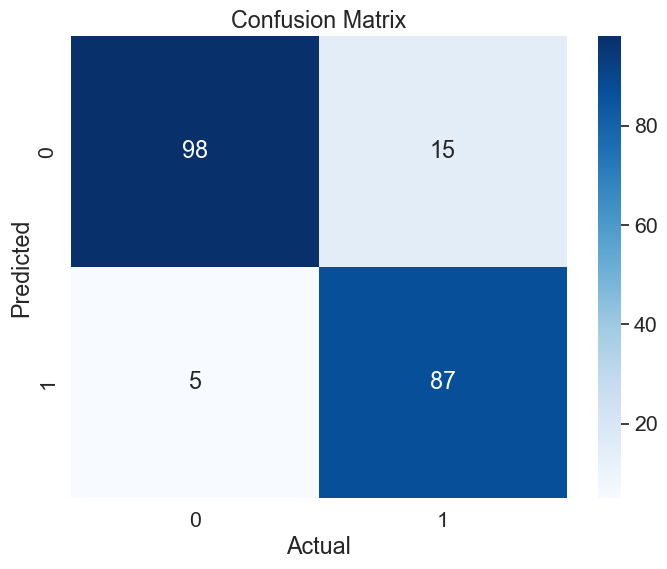

In [129]:
# TODO
cm = confusion_matrix(predictions, y_val, _)
plot_confusion_matrix(cm, _)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [130]:
print(recall_score(cm))

0.9514563106796117


In [131]:
print(precision_score(cm))

0.8672566371681416


In [132]:
print(f1_score(cm))

0.9074074074074074


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


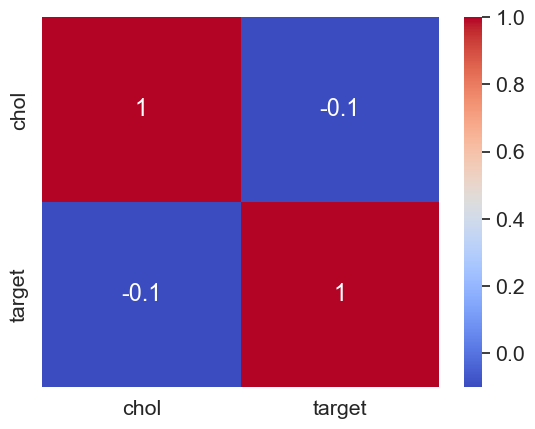

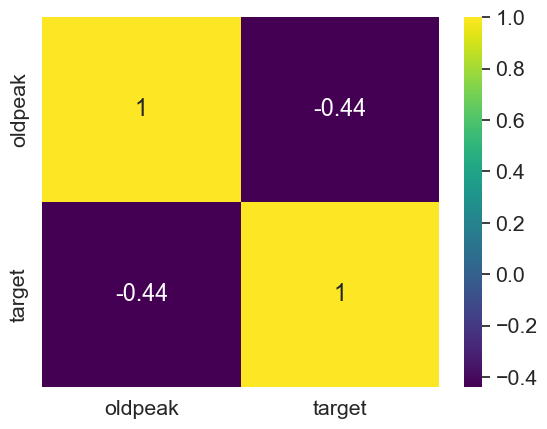

In [134]:
# TODO
features = [['chol', 'target'], ['oldpeak', 'target']]
cmaps = ['coolwarm', 'viridis']

for feature, cmap in zip(features, cmaps):
    sns.heatmap(df[feature].corr(), annot=True, cmap=cmap)
    plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [150]:
# TODO

indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

X_no_chol_train = np.copy(X_train)
X_no_chol_val = np.copy(X_val)
X_no_chol_train[:, 4] = 0
X_no_chol_val[:, 4] = 0

no_chol_model = MixedDataNB()
no_chol_model.fit(X_no_chol_train, y_train)
accuracy = accuracy_score(y_val, no_chol_model.predict(X_no_chol_val))
print(accuracy)

0.9170731707317074


Remove oldpeak and test model

In [156]:
# TODO
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

X_no_oldpeak_train = np.copy(X_train)
X_no_oldpeak_val = np.copy(X_val)
X_no_oldpeak_train[:, 9] = 0
X_no_oldpeak_val[:, 9] = 0

no_oldpeak_model = MixedDataNB()
no_oldpeak_model.fit(X_no_oldpeak_train, y_train)
accuracy = accuracy_score(y_val, no_oldpeak_model.predict(X_no_oldpeak_val))
print(accuracy)

0.8975609756097561


Comparison

**Answer:**
Removing oldpeak feature reduced the accuracy of our model, while removing chol feature didn't have that much effect on the accuracy of our model

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer: 
The Naive Bayes model actually did better in terms of accuracy, this could be due to the fact that naive bayes model acts better on simple datasets while perceptron model is better for complex datasets with high dimensionality. Moreover, perceptron is not good for generalization and may overfit to the training data

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [166]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([-1 if label == 0 else label for label in y])
bias_column = np.full((X.shape[0], 1), -1)
X = np.hstack((X, bias_column))

### Find the distribution


Find the number of samples from each target label.

In [167]:
# TODO
num_samples_per_label = df['target'].value_counts().to_dict()

print("Number of samples from each target label:")
for label, count in num_samples_per_label.items():
    print(f"Target {label}: {count} samples")

Number of samples from each target label:
Target 0: 499 samples
Target 1: 226 samples


### Split data

In [168]:
# TODO
test_size = 0.2
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

### Train model and make predictions

In [169]:
# TODO
model = MixedDataNB()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(accuracy_score(y_val, predictions))

0.9103448275862069


### Plot confusion matrix

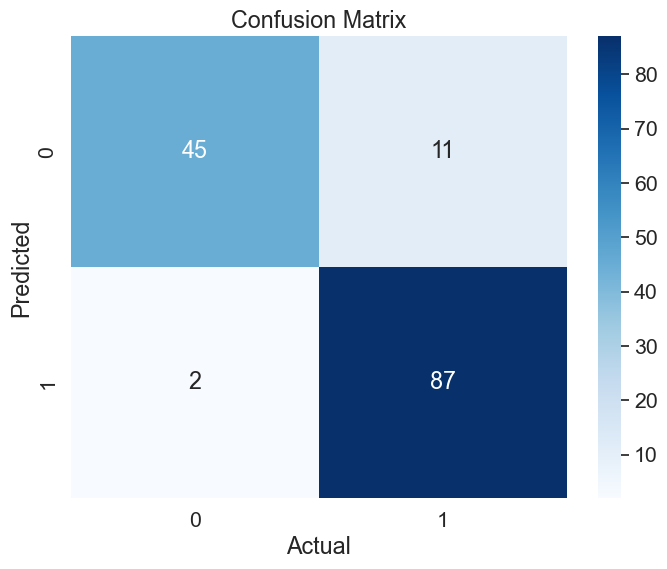

In [170]:
# TODO
cm = confusion_matrix(predictions, y_val, _)
plot_confusion_matrix(cm, _)

### Calculate metrics

In [171]:
# TODO
print(f'Recall: {recall_score(cm)}')
print(f'Precision: {precision_score(cm)}')
print(f'F1 Score: {f1_score(cm)}')

Recall: 0.9574468085106383
Precision: 0.8035714285714286
F1 Score: 0.8737864077669905


## Second dataset

### Load data

In [173]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([-1 if label == 0 else label for label in y])
bias_column = np.full((X.shape[0], 1), -1)
X = np.hstack((X, bias_column))

### Find the distribution


Find the number of samples from each target label.

In [174]:
# TODO
num_samples_per_label = df['target'].value_counts().to_dict()

print("Number of samples from each target label:")
for label, count in num_samples_per_label.items():
    print(f"Target {label}: {count} samples")

Number of samples from each target label:
Target 0: 499 samples
Target 1: 126 samples


### Split data

In [175]:
# TODO
test_size = 0.2
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

### Train model and make predictions

In [176]:
# TODO
model = MixedDataNB()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(accuracy_score(y_val, predictions))

0.904


### Plot confusion matrix

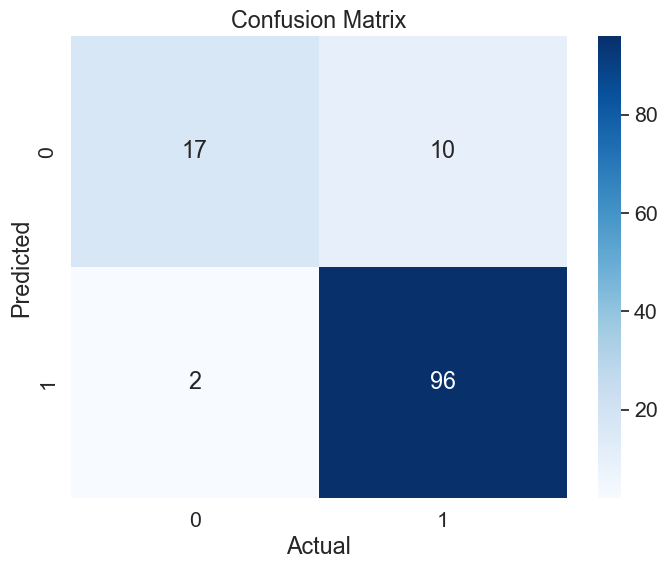

In [177]:
# TODO
cm = confusion_matrix(predictions, y_val, _)
plot_confusion_matrix(cm, _)

### Calculate metrics

In [178]:
# TODO
print(f'Recall: {recall_score(cm)}')
print(f'Precision: {precision_score(cm)}')
print(f'F1 Score: {f1_score(cm)}')

Recall: 0.8947368421052632
Precision: 0.6296296296296297
F1 Score: 0.7391304347826088


## Third dataset

### Load data

In [179]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.array([-1 if label == 0 else label for label in y])
bias_column = np.full((X.shape[0], 1), -1)
X = np.hstack((X, bias_column))

### Find the distribution


Find the number of samples from each target label.

In [180]:
# TODO
num_samples_per_label = df['target'].value_counts().to_dict()

print("Number of samples from each target label:")
for label, count in num_samples_per_label.items():
    print(f"Target {label}: {count} samples")

Number of samples from each target label:
Target 0: 499 samples
Target 1: 26 samples


### Split data

In [181]:
# TODO
test_size = 0.2
indices = np.random.permutation(len(X))
num_test_samples = int(X.shape[0] * test_size)

train_indices = indices[num_test_samples:]
test_indices = indices[:num_test_samples]

X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

### Train model and make predictions

In [183]:
# TODO
model = MixedDataNB()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(accuracy_score(y_val, predictions))

0.9619047619047619


### Plot confusion matrix

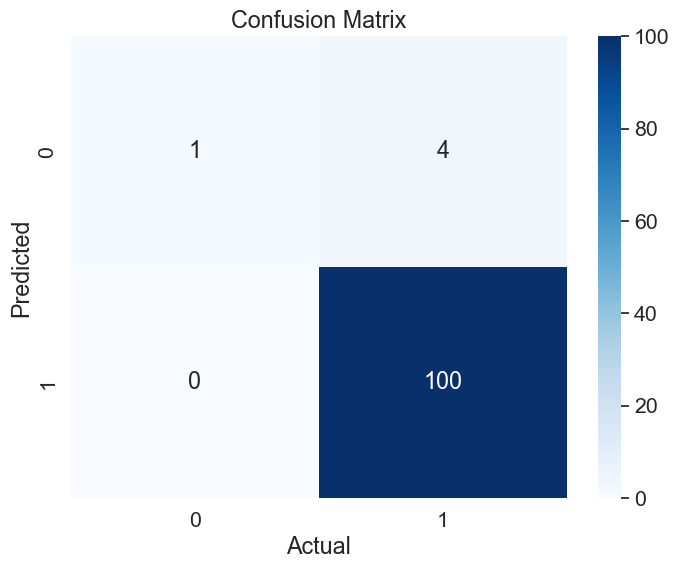

In [184]:
# TODO
cm = confusion_matrix(predictions, y_val, _)
plot_confusion_matrix(cm, _)

### Calculate metrics

In [185]:
# TODO
print(f'Recall: {recall_score(cm)}')
print(f'Precision: {precision_score(cm)}')
print(f'F1 Score: {f1_score(cm)}')

Recall: 1.0
Precision: 0.2
F1 Score: 0.33333333333333337


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**
First of all, accuracy is not a good option because of the imbalanced datasets and insufficient amount of data for each target label. Moreover, Recall was proportionally high here becauese there was not much data on target label 1, On the other hand, Percision tends to be lower than what is real because the number of 0 labeled data is much more than the number of 1 labeled data. In conclusion, F1 score is the best option here, because it take into account both of the above metrics that doesn't do well in this scenario due to imbalanced datasets.